# WeatherPy
----

#### Observations
1)Weather becomes warmer as you approach the equator
2) There isn't a strong correlation between humidity and latitude for either hemisphere
3)Latitude and wind speed aren't correlated 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to  our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count (must be over 500 UNIQUE cities)
len(cities)


631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Website API URL Structure
url = "api.openweathermap.org/data/2.5/weather?q="
units = "imperial"

query_url =f"{url}?appid={weather_api_key}&units={units}&q="

print(query_url)

api.openweathermap.org/data/2.5/weather?q=?appid=ceba7512950f5995f8972a84d840c215&units=imperial&q=


In [4]:
def cityQuery(city):
    return f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q={city}"

In [5]:
cityQuery('mecca')

'http://api.openweathermap.org/data/2.5/weather?appid=ceba7512950f5995f8972a84d840c215&units=imperial&q=mecca'

In [70]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
records = 1
sets = 1


for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        sets += 1
        records = 0
    
    # Log the record, and set numbers
    print("Processing Record %s of Set %s | %s" % (records, sets, city))
    
    # Add 1 to the record count
    records += 1
   
    # Run an API request for each of the cities
    try:
       weather_info.append({'City':response['name'],
                         'Country':response['sys']['country'],
                         'Date':response['dt'],
                         'lat':response['coord']['lat'],
                         'lng':response['coord']['lon'],
                         'Humidity':response['main']['humidity'],
                          'Wind Speed':response['wind']['speed'],
                          'Max Temp':response['main']['temp_max'],
                          'Cloudiness':response['clouds']['all']})
             
    except Exception as e:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vestmanna
Processing Record 4 of Set 1 | tumannyy
Processing Record 5 of Set 1 | husavik
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | selma
Processing Record 8 of Set 1 | dzhusaly
Processing Record 9 of Set 1 | tshela
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | humboldt
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | pasni
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | veinticinco de mayo
Processing Record 23 of Set 1 | mataura
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
#create dataframe
city_data_pd = pd.DataFrame(weather_info)
display(city_data_pd)

left = city_data_pd['Cloudiness'].str[-3:]
left

lats = city_data_pd["lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv("../output_data/cities.csv", index_label="City_ID")

# Show Record Count
city_data_pd.count()

,City,Country,Date,lat,lng,Humidity,Wind Speed,Max Temp,Cloudiness
0,Hermanus,ZA,1585697097,-34.42,19.23,89,11.95,61.00,{'all': 34}
1,Ushuaia,AR,1585696974,-54.80,-68.30,76,12.75,48.20,{'all': 40}
2,Vestmanna,FO,1585697097,62.16,-7.17,87,28.86,44.60,{'all': 100}
3,Husavik,IS,1585697448,66.04,-17.34,51,39.15,39.20,{'all': 90}
4,Tasiilaq,GL,1585697448,65.61,-37.64,29,29.97,24.80,{'all': 2}
...,...,...,...,...,...,...,...,...,...
3099,Tres Arroyos,AR,1585697528,-38.37,-60.28,69,8.68,61.92,97
3100,Tres Arroyos,AR,1585697528,-38.37,-60.28,69,8.68,61.92,97
3101,Tres Arroyos,AR,1585697528,-38.37,-60.28,69,8.68,61.92,97
3102,Tres Arroyos,AR,1585697528,-38.37,-60.28,69,8.68,61.92,97


City          3104
Country       3104
Date          3104
lat           3104
lng           3104
Humidity      3104
Wind Speed    3104
Max Temp      3104
Cloudiness    3104
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

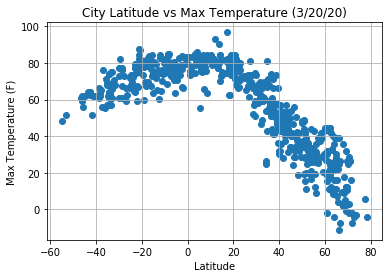

In [44]:

x_values = city_data_pd["lat"]
y_values = city_data_pd["Humidity"]

plt.scatter(x_values,y_values)

plt.grid(True)

plt.title("City Latitude vs Max Temperature (3/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

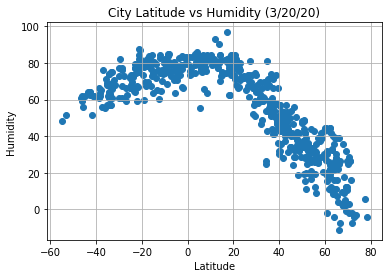

In [45]:
x_values = city_data_pd["lat"]
y_values = city_data_pd["Max Temp"]

plt.scatter(x_values,y_values)

plt.grid(True)

plt.title("City Latitude vs Humidity (3/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.savefig("../Images/LatHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

TypeError: float() argument must be a string or a number, not 'dict'

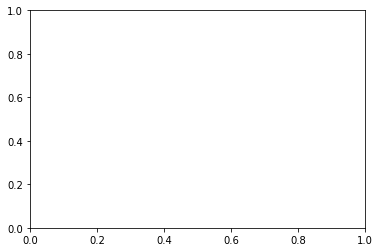

In [65]:
x_values = city_data_pd["lat"]
y_values = city_data_pd["Cloudiness"]

plt.scatter(x_values,y_values)

plt.grid(True)

plt.title("City Latitude vs Cloudiness (3/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/LatCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

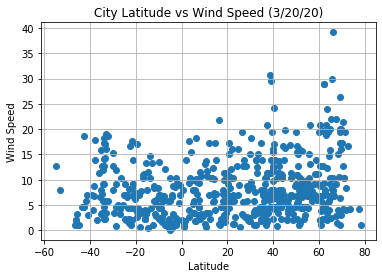

In [47]:
x_values = city_data_pd["lat"]
y_values = city_data_pd["Wind Speed"]

plt.scatter(x_values,y_values)

plt.grid(True)

plt.title("City Latitude vs Wind Speed (3/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../Images/LatWindSpeed.png")
plt.show()

## Linear Regression

In [53]:
#  Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # regresson - southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [52]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = city_data_pd.loc[(city_data_pd["lat"] >= 0)]
southern_hem_df = city_data_pd.loc[(city_data_pd["lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9107789546916858


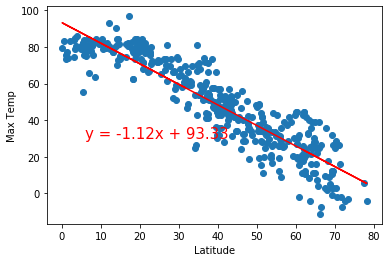

In [56]:
x_values = northern_hem_df["lat"]
y_values = northern_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8533433709674927


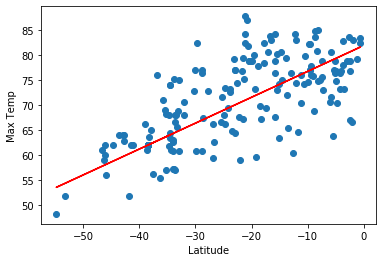

In [57]:
x_values = southern_hem_df["lat"]
y_values = southern_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24266444002210952


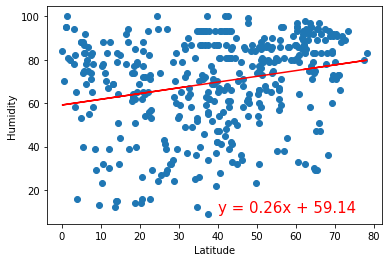

In [55]:
x_values = northern_hem_df["lat"]
y_values = northern_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3355490640287104


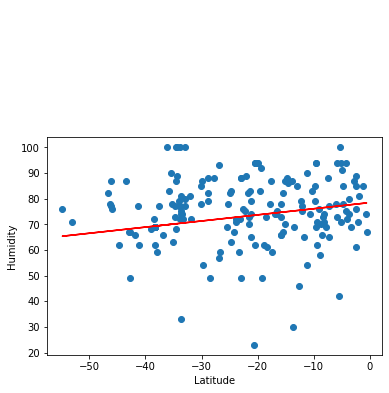

In [59]:
x_values = southern_hem_df["lat"]
y_values = southern_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19221883760826425


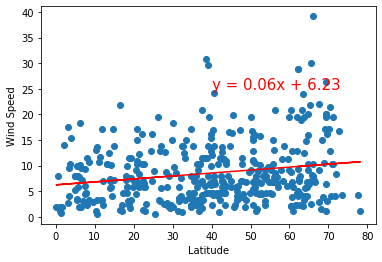

In [61]:
x_values = northern_hem_df["lat"]
y_values = northern_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4268646884346743


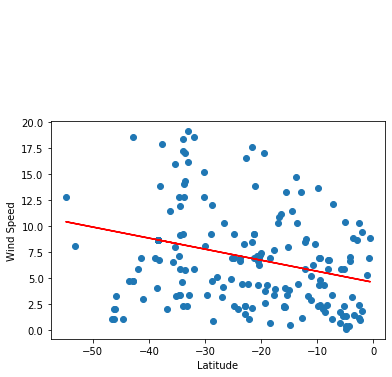

In [60]:
x_values = southern_hem_df["lat"]
y_values = southern_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))